In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
import keras
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/data/Prepared/final_dataset_cse_cic.csv')

In [4]:
data = data.sample(frac=1)

In [5]:
data.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 908102 entries, 743090 to 673701
Data columns (total 71 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dst Port           908102 non-null  int64  
 1   Protocol           908102 non-null  int64  
 2   Flow Duration      908102 non-null  int64  
 3   Tot Fwd Pkts       908102 non-null  int64  
 4   Tot Bwd Pkts       908102 non-null  int64  
 5   TotLen Fwd Pkts    908102 non-null  int64  
 6   TotLen Bwd Pkts    908102 non-null  float64
 7   Fwd Pkt Len Max    908102 non-null  int64  
 8   Fwd Pkt Len Min    908102 non-null  int64  
 9   Fwd Pkt Len Mean   908102 non-null  float64
 10  Fwd Pkt Len Std    908102 non-null  float64
 11  Bwd Pkt Len Max    908102 non-null  int64  
 12  Bwd Pkt Len Min    908102 non-null  int64  
 13  Bwd Pkt Len Mean   908102 non-null  float64
 14  Bwd Pkt Len Std    908102 non-null  float64
 15  Flow Byts/s        908102 non-null  float64
 1

<Axes: >

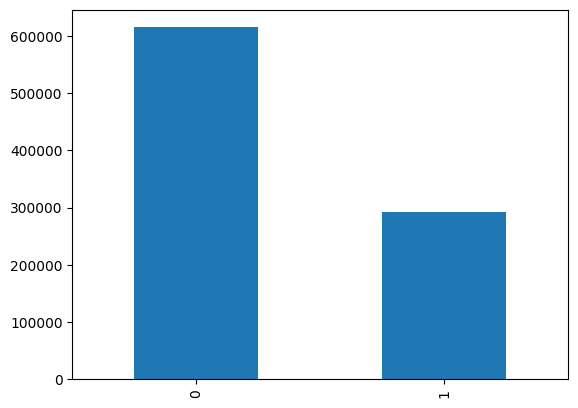

In [ ]:
data.Label.value_counts().plot.bar()

In [6]:
X = data.drop(columns='Label', axis=1)
y = data['Label']


In [7]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)

In [ ]:
print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (726481, 70)
X val (90810, 70)
X test (90811, 70)
Y train (726481,)
Y val (90810,)
Y test (90811,)


In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)


In [13]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)




In [16]:
model = Sequential([
    Dense(units=70,input_dim=X_train.shape[1], activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_val, y_val), shuffle=True)
# print(f"Only {len(history.history['loss'])} epochs are run")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,10)
plt.xticks(np.arange(0, 12, 2))
plt.show()

Epoch 1/10
22703/22703 [==============================] - 34s 1ms/step - loss: 0.2607 - accuracy: 0.9092 - val_loss: 0.2499 - val_accuracy: 0.9141
Epoch 2/10
22703/22703 [==============================] - 33s 1ms/step - loss: 0.2603 - accuracy: 0.9101 - val_loss: 0.2423 - val_accuracy: 0.9168
Epoch 3/10
22703/22703 [==============================] - 35s 2ms/step - loss: 0.2499 - accuracy: 0.9148 - val_loss: 0.2455 - val_accuracy: 0.9166
Epoch 4/10
22703/22703 [==============================] - 34s 1ms/step - loss: 0.2474 - accuracy: 0.9153 - val_loss: 0.2558 - val_accuracy: 0.9112
Epoch 5/10
22703/22703 [==============================] - 37s 2ms/step - loss: 0.2487 - accuracy: 0.9153 - val_loss: 0.2474 - val_accuracy: 0.9171
Epoch 6/10
  806/22703 [>.............................] - ETA: 1:01 - loss: 0.2520 - accuracy: 0.9142

KeyboardInterrupt: 

Epoch 1/10
22703/22703 [==============================] - 121s 5ms/step - loss: 0.2504 - accuracy: 0.9142 - val_loss: 0.3702 - val_accuracy: 0.8512
Epoch 2/10
22703/22703 [==============================] - 134s 6ms/step - loss: 0.2409 - accuracy: 0.9169 - val_loss: 0.2372 - val_accuracy: 0.9180
Epoch 3/10
22703/22703 [==============================] - 110s 5ms/step - loss: 0.2388 - accuracy: 0.9175 - val_loss: 0.2357 - val_accuracy: 0.9187
Epoch 4/10
22703/22703 [==============================] - 109s 5ms/step - loss: 0.2377 - accuracy: 0.9178 - val_loss: 0.2423 - val_accuracy: 0.9184
Epoch 5/10
22703/22703 [==============================] - 128s 6ms/step - loss: 0.2366 - accuracy: 0.9182 - val_loss: 0.2348 - val_accuracy: 0.9191
Epoch 6/10
22703/22703 [==============================] - 112s 5ms/step - loss: 0.2358 - accuracy: 0.9183 - val_loss: 0.2331 - val_accuracy: 0.9190
Epoch 7/10
22703/22703 [==============================] - 111s 5ms/step - loss: 0.2352 - accuracy: 0.9183 - val_

([<matplotlib.axis.XTick at 0x7dad10ef2bc0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

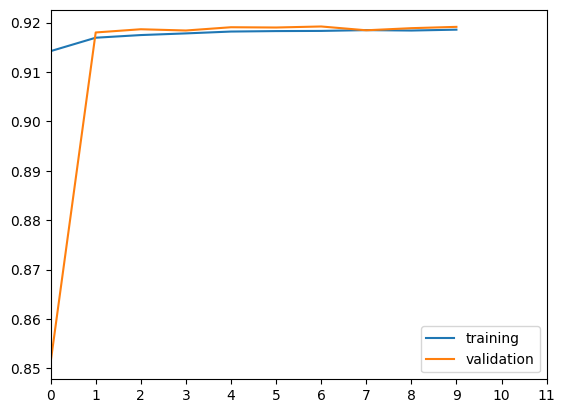

In [ ]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=70, input_dim=70)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=256)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=256)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=1)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.xlim(0,10)
plt.xticks(np.arange(0, 12, 1))

In [ ]:
y_pred = model.predict(X_test)


2838/2838 [==============================] - 7s 2ms/step


0

In [ ]:
y_test = y_test.astype(int)
y_predict = np.round(model.predict(X_test))
print(f"confusion matrix: {confusion_matrix(y_test, y_predict)}")

5676/5676 [==============================] - 14s 3ms/step


array([[122645,    373],
       [ 14502,  44101]])

In [ ]:
print(classification_report(y_test, y_predict, target_names=['Benign', 'Anomaly']))

              precision    recall  f1-score   support

      Benign       0.89      1.00      0.94    123018
     Anomaly       0.99      0.75      0.86     58603

    accuracy                           0.92    181621
   macro avg       0.94      0.87      0.90    181621
weighted avg       0.93      0.92      0.91    181621



Epoch 1/20
20181/20181 [==============================] - 140s 7ms/step - loss: 0.2551 - accuracy: 0.9132 - val_loss: 0.3088 - val_accuracy: 0.8982
Epoch 2/20
20181/20181 [==============================] - 129s 6ms/step - loss: 0.2439 - accuracy: 0.9160 - val_loss: 0.2446 - val_accuracy: 0.9164
Epoch 3/20
20181/20181 [==============================] - 127s 6ms/step - loss: 0.2415 - accuracy: 0.9168 - val_loss: 0.2422 - val_accuracy: 0.9159
Epoch 4/20
20181/20181 [==============================] - 131s 6ms/step - loss: 0.2400 - accuracy: 0.9173 - val_loss: 0.2393 - val_accuracy: 0.9170
Epoch 5/20
20181/20181 [==============================] - 125s 6ms/step - loss: 0.2390 - accuracy: 0.9176 - val_loss: 0.2391 - val_accuracy: 0.9169
Epoch 6/20
20181/20181 [==============================] - 125s 6ms/step - loss: 0.2383 - accuracy: 0.9179 - val_loss: 0.2385 - val_accuracy: 0.9164
Epoch 7/20
20181/20181 [==============================] - 123s 6ms/step - loss: 0.2378 - accuracy: 0.9180 - val_

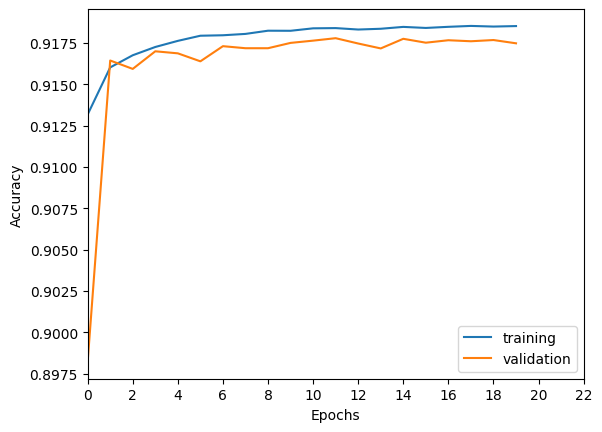

In [ ]:

# ADDED ONE EXTRA HIDDEN LAYER MAKING IT THREE HIDDEN LAYERS
model = Sequential()
model.add(Dense(units=70)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
model.add(Dropout(0.1))

model.add(Dense(units=256)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
model.add(Dropout(0.1))

model.add(Dense(units=256)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.1111, epochs=20, verbose=1)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim(0,22)
plt.xticks(np.arange(0, 24, 2))
plt.show()

In [ ]:
0.1 * 900000

90000.0

In [ ]:
print(classification_report(y_test, y_predict, target_names=['Benign', 'Anomaly']))

              precision    recall  f1-score   support

      Benign       0.90      1.00      0.94     61438
     Anomaly       0.99      0.76      0.86     29373

    accuracy                           0.92     90811
   macro avg       0.94      0.88      0.90     90811
weighted avg       0.93      0.92      0.92     90811



In [ ]:
9081020/817291.8

0.1111 * 817291.8

0.11458074092998363
12.940845792120152
data.shape
208102/2

104051-data.shape[0]
804051
(10405100)/804051

0.11458074092998363 * data.shape[0]

.12940845792120152 * (data.shape[0] - 104051.0)

104051.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

# X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

Epoch 1/20
22703/22703 [==============================] - 78s 3ms/step - loss: 0.2511 - accuracy: 0.9142 - val_loss: 0.2422 - val_accuracy: 0.9166
Epoch 2/20
22703/22703 [==============================] - 70s 3ms/step - loss: 0.2402 - accuracy: 0.9176 - val_loss: 0.2383 - val_accuracy: 0.9177
Epoch 3/20
22703/22703 [==============================] - 94s 4ms/step - loss: 0.2380 - accuracy: 0.9182 - val_loss: 0.2353 - val_accuracy: 0.9184
Epoch 4/20
22703/22703 [==============================] - 97s 4ms/step - loss: 0.2366 - accuracy: 0.9184 - val_loss: 0.2349 - val_accuracy: 0.9183
Epoch 5/20
22703/22703 [==============================] - 83s 4ms/step - loss: 0.2360 - accuracy: 0.9186 - val_loss: 0.2344 - val_accuracy: 0.9185
Epoch 6/20
22703/22703 [==============================] - 85s 4ms/step - loss: 0.2350 - accuracy: 0.9186 - val_loss: 0.2354 - val_accuracy: 0.9182
Epoch 7/20
22703/22703 [==============================] - 78s 3ms/step - loss: 0.2346 - accuracy: 0.9186 - val_loss: 0

([<matplotlib.axis.XTick at 0x794b037bc0a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22')])

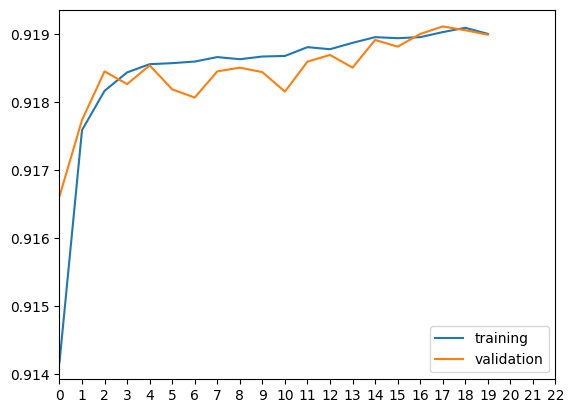

In [ ]:

# ADDED ONE EXTRA HIDDEN LAYER MAKING IT THREE HIDDEN LAYERS
model = Sequential()
model.add(Dense(units=70)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=128)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# # model.add(Dropout(0.1))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.1111, epochs=20, verbose=1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.xlim(0,22)
plt.xticks(np.arange(0, 23, 1))

In [ ]:
y_test = y_test.astype(int)
y_predict = np.round(model.predict(X_test))
# confusion_matrix(y_test, y_predict)

# y_predict = model.predict(X_test, verbose=2)
print(classification_report(y_test, y_predict, target_names=['Benign', 'Anomaly']))

2838/2838 [==============================] - 15s 5ms/step
              precision    recall  f1-score   support

      Benign       0.90      1.00      0.94     61340
     Anomaly       0.99      0.76      0.86     29471

    accuracy                           0.92     90811
   macro avg       0.94      0.88      0.90     90811
weighted avg       0.93      0.92      0.92     90811



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

# X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)

Epoch 1/10
22703/22703 [==============================] - 79s 3ms/step - loss: 0.2485 - accuracy: 0.9143 - val_loss: 0.2405 - val_accuracy: 0.9158
Epoch 2/10
22703/22703 [==============================] - 74s 3ms/step - loss: 0.2408 - accuracy: 0.9167 - val_loss: 0.2594 - val_accuracy: 0.9171
Epoch 3/10
22703/22703 [==============================] - 76s 3ms/step - loss: 0.2386 - accuracy: 0.9176 - val_loss: 0.2380 - val_accuracy: 0.9176
Epoch 4/10
22703/22703 [==============================] - 73s 3ms/step - loss: 0.2378 - accuracy: 0.9176 - val_loss: 0.2409 - val_accuracy: 0.9171
Epoch 5/10
22703/22703 [==============================] - 73s 3ms/step - loss: 0.2369 - accuracy: 0.9179 - val_loss: 0.2455 - val_accuracy: 0.9175
Epoch 6/10
22703/22703 [==============================] - 72s 3ms/step - loss: 0.2364 - accuracy: 0.9179 - val_loss: 0.2408 - val_accuracy: 0.9176
Epoch 7/10
22703/22703 [==============================] - 69s 3ms/step - loss: 0.2359 - accuracy: 0.9181 - val_loss: 0

Text(0, 0.5, 'Accuracy')

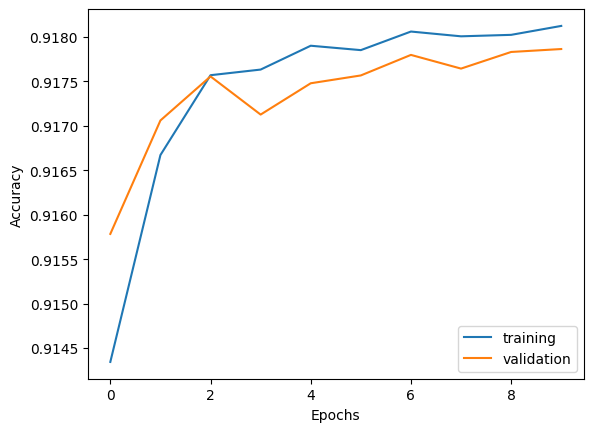

In [ ]:

# ADDED ONE EXTRA HIDDEN LAYER MAKING IT THREE HIDDEN LAYERS
model = Sequential()
model.add(Dense(units=70)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# model.add(Dropout(0.1))

model.add(Dense(units=128)),
model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
model.add(Activation('relu')),
# # model.add(Dropout(0.1))

# model.add(Dense(units=256)),
# model.add(BatchNormalization()),                    # Add Batchnorm layer before Activation
# model.add(Activation('relu')),
# # model.add(Dropout(0.1))


model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.1111, epochs=10, verbose=1)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'lower right')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
!pip install keras-tuner

In [ ]:
import keras_tuner

### Using Randomforestclassifier to perform feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
# Get feature importances
feature_importances = rfc.feature_importances_
feature_importances

array([1.14486391e-01, 6.38901818e-04, 3.50028607e-03, 1.97197894e-02,
       9.15465071e-03, 2.31697921e-02, 2.79195559e-03, 1.17512467e-02,
       8.58509425e-04, 4.78476071e-03, 2.75440208e-03, 2.14395038e-03,
       1.27147009e-03, 4.28085936e-03, 2.31858827e-03, 2.14314944e-02,
       6.76282027e-02, 6.16237202e-03, 1.12160465e-03, 1.69902911e-03,
       3.40290129e-04, 2.24542837e-03, 8.75477556e-03, 1.14666018e-03,
       2.01104837e-03, 4.40821333e-04, 8.22427758e-03, 7.15425906e-03,
       8.78182666e-03, 6.56799181e-03, 6.40685000e-03, 4.49971915e-04,
       4.34745982e-04, 3.23999896e-02, 2.15006754e-02, 4.98098637e-02,
       7.93690117e-02, 8.62559765e-04, 1.20879225e-02, 2.88334580e-02,
       9.93901008e-03, 8.70995712e-03, 1.01290160e-04, 3.49515270e-04,
       3.09375981e-03, 8.09642852e-03, 4.03001372e-03, 1.20169525e-03,
       2.44020794e-04, 3.06019450e-03, 4.14265449e-03, 1.22770301e-02,
       8.10269707e-03, 6.12064529e-03, 2.23106322e-02, 1.25695310e-02,
      

In [ ]:
samp = data.drop(columns='Label')
columns = samp.columns

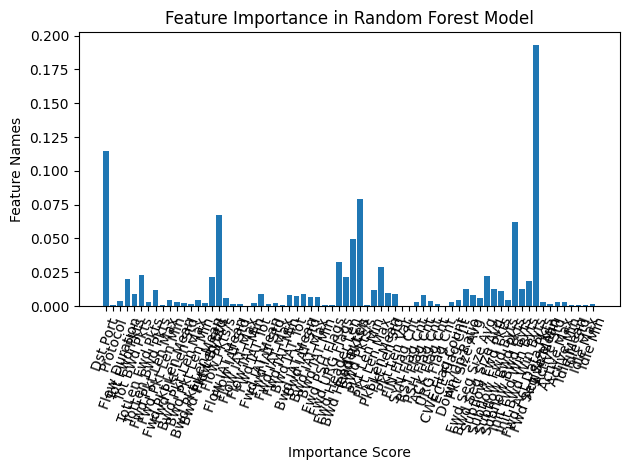

In [ ]:
len(feature_importances)

plt.bar(columns, feature_importances)
plt.xlabel('Importance Score')
plt.ylabel('Feature Names')
plt.title('Feature Importance in Random Forest Model')
plt.xticks(rotation=70)  # Rotate x-axis labels for better readability
plt.tight_layout()

In [ ]:
# Optional: Select features based on a threshold
importance_threshold = 0.01
selected_features = columns[feature_importances > importance_threshold]

print(len(selected_features))
selected_features


20


Index(['Dst Port', 'Tot Fwd Pkts', 'TotLen Fwd Pkts', 'Fwd Pkt Len Max',
       'Flow Byts/s', 'Flow Pkts/s', 'Fwd Header Len', 'Bwd Header Len',
       'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts',
       'Subflow Bwd Pkts', 'Init Fwd Win Byts', 'Init Bwd Win Byts',
       'Fwd Act Data Pkts', 'Fwd Seg Size Min'],
      dtype='object')

In [ ]:
data_feature_engineering = data[['Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'Fwd Pkt Len Max', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Max', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Max',
       'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s',
       'Pkt Len Max', 'Pkt Len Mean', 'Pkt Size Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Init Fwd Win Byts',
       'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Label']]

data_feature_engineering = data_feature_engineering.reset_index(drop=True)

data_feature_engineering

,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Flow Pkts/s,Flow IAT Mean,Flow IAT Max,Fwd IAT Tot,...,Pkt Len Mean,Pkt Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Label
0,22,386368,24,20,1944,640,1.138811e+02,8.985302e+03,103889.0,386284.0,...,102.422222,104.750000,24,1944,20,26883,230,16,32,1
1,22,7,1,1,0,0,2.857143e+05,7.000000e+00,7.0,0.0,...,0.000000,0.000000,1,0,1,241,230,0,32,1
2,3389,4385832,10,9,1148,677,4.332131e+00,2.436573e+05,1861075.0,4385832.0,...,136.450000,143.631579,10,1148,9,8192,62852,5,20,0
3,443,115854988,19,17,999,517,3.107333e-01,3.310143e+06,10000918.0,115854988.0,...,42.027027,43.194444,19,999,17,8192,980,15,20,0
4,21,1,1,1,0,0,2.000000e+06,1.000000e+00,1.0,0.0,...,0.000000,0.000000,1,0,1,26883,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908097,22,7,1,1,0,0,2.857143e+05,7.000000e+00,7.0,0.0,...,0.000000,0.000000,1,0,1,241,230,0,32,1
908098,22,7,1,1,0,0,2.857143e+05,7.000000e+00,7.0,0.0,...,0.000000,0.000000,1,0,1,241,230,0,32,1
908099,53,308,1,1,40,40,6.493506e+03,3.080000e+02,308.0,0.0,...,45.333333,68.000000,1,40,1,-1,-1,0,8,0
908100,443,72527958,8,9,1207,821,2.343924e-01,4.532997e+06,59951671.0,72527958.0,...,288.000000,304.941176,8,1207,9,8192,509,3,20,0


In [ ]:
X = data_feature_engineering.drop(columns='Label')
y = data_feature_engineering['Label']


X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)

print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (544861, 26)
X val (181620, 26)
X test (181621, 26)
Y train (544861,)
Y val (181620,)
Y test (181621,)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(units=26, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
# history = model.fit(X_train, y_train, epochs=10, callbacks=[callback])
# print(f"Only {len(history.history['loss'])} epochs are run")

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
17027/17027 [==============================] - 43s 2ms/step - loss: 0.2720 - accuracy: 0.9117
Epoch 2/10
17027/17027 [==============================] - 42s 2ms/step - loss: 0.2582 - accuracy: 0.9163
Epoch 3/10
17027/17027 [==============================] - 42s 2ms/step - loss: 0.2556 - accuracy: 0.9166
Epoch 4/10
17027/17027 [==============================] - 56s 3ms/step - loss: 0.2533 - accuracy: 0.9169
Epoch 5/10
17027/17027 [==============================] - 42s 2ms/step - loss: 0.2512 - accuracy: 0.9171
Epoch 6/10
17027/17027 [==============================] - 40s 2ms/step - loss: 0.2499 - accuracy: 0.9176
Epoch 7/10
17027/17027 [==============================] - 43s 3ms/step - loss: 0.2488 - accuracy: 0.9178
Epoch 8/10
17027/17027 [==============================] - 40s 2ms/step - loss: 0.2473 - accuracy: 0.9185
Epoch 9/10
17027/17027 [==============================] - 40s 2ms/step - loss: 0.2463 - accuracy: 0.9188
Epoch 10/10
17027/17027 [==============================

In [ ]:
model.evaluate(X_train, y_train, verbose=2)

In [ ]:
model = Sequential([
    Dense(units=26, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
     Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=2)

Epoch 1/20
17027/17027 - 71s - loss: 0.2727 - accuracy: 0.9114 - 71s/epoch - 4ms/step
Epoch 2/20
17027/17027 - 75s - loss: 0.2579 - accuracy: 0.9160 - 75s/epoch - 4ms/step
Epoch 3/20
17027/17027 - 72s - loss: 0.2542 - accuracy: 0.9167 - 72s/epoch - 4ms/step
Epoch 4/20
17027/17027 - 74s - loss: 0.2526 - accuracy: 0.9172 - 74s/epoch - 4ms/step
Epoch 5/20
17027/17027 - 74s - loss: 0.2503 - accuracy: 0.9176 - 74s/epoch - 4ms/step
Epoch 6/20
17027/17027 - 73s - loss: 0.2494 - accuracy: 0.9178 - 73s/epoch - 4ms/step
Epoch 7/20
17027/17027 - 77s - loss: 0.2486 - accuracy: 0.9178 - 77s/epoch - 5ms/step
Epoch 8/20
17027/17027 - 73s - loss: 0.2474 - accuracy: 0.9180 - 73s/epoch - 4ms/step
Epoch 9/20
17027/17027 - 75s - loss: 0.2465 - accuracy: 0.9186 - 75s/epoch - 4ms/step
Epoch 10/20
17027/17027 - 77s - loss: 0.2463 - accuracy: 0.9187 - 77s/epoch - 5ms/step
Epoch 11/20
17027/17027 - 102s - loss: 0.2453 - accuracy: 0.9189 - 102s/epoch - 6ms/step
Epoch 12/20
17027/17027 - 73s - loss: 0.2451 - acc

In [ ]:
model.evaluate(X_val, y_val, verbose=2)

5676/5676 - 9s - loss: 0.2455 - accuracy: 0.9192 - 9s/epoch - 2ms/step


[0.2454671412706375, 0.9192104339599609]

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

In [ ]:
# Exclude autocorrelation and get the top n highest correlated attributes
n = 40  # Set the number of attributes you want to display
top_corr = correlation_matrix['Label'].drop('Label').nlargest(n)

# Add the 'label' attribute as the center of the correlation
top_corr_ = pd.concat([top_corr, correlation_matrix['Label'].drop('Label')])
top_corr_ = pd.DataFrame(top_corr_)

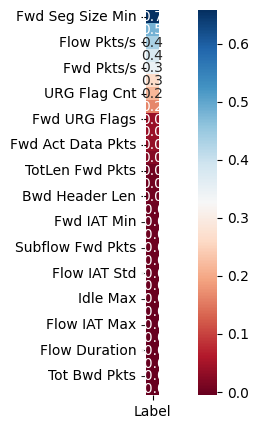

In [ ]:
plt.figure(figsize=(10, 5))

# Create the heatmap
sns.heatmap(top_corr, annot=True, cmap="RdBu", fmt=".1f", square=True)

# Display the heatmap
plt.show()

In [ ]:
top_corr.index

40

In [ ]:
columns = list(top_corr.index)
columns.append('Label')
len(columns)

111

In [ ]:
data_after_corr = data[['Fwd Seg Size Min', 'Bwd Pkts/s', 'Flow Pkts/s', 'Init Fwd Win Byts',
       'Fwd Pkts/s', 'PSH Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio',
       'Fwd URG Flags', 'CWE Flag Count', 'Fwd Act Data Pkts',
       'Fwd Header Len', 'TotLen Fwd Pkts', 'Subflow Fwd Byts',
       'Bwd Header Len', 'Flow IAT Min', 'Fwd IAT Min', 'Tot Fwd Pkts',
       'Subflow Fwd Pkts', 'Idle Std', 'Flow IAT Std', 'Fwd IAT Std',
       'Idle Max', 'Fwd IAT Max', 'Flow IAT Max', 'Fwd IAT Tot',
       'Flow Duration', 'Idle Mean', 'Tot Bwd Pkts', 'Subflow Bwd Pkts',
       'TotLen Bwd Pkts', 'Subflow Bwd Byts', 'Active Min', 'Active Std',
       'Active Mean', 'Active Max', 'Pkt Len Var', 'Bwd IAT Min',
       'FIN Flag Cnt', 'ACK Flag Cnt', 'Label']]

In [ ]:
X = data_after_corr.drop(columns='Label')
y = data_after_corr['Label']

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=.5, random_state=42)

print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_val = scaler.transform(X_val)

X_test = scaler.transform(X_test)


X train (544861, 40)
X val (181620, 40)
X test (181621, 40)
Y train (544861,)
Y val (181620,)
Y test (181621,)


In [ ]:
model = Sequential([
    Dense(units=40, activation='relu'),
    Dense(units=256, activation='relu'),
    # Dense(units=256, activation='relu'),
    #  Dense(units=216, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
17027/17027 [==============================] - 38s 2ms/step - loss: 0.2738 - accuracy: 0.9110
Epoch 2/10
17027/17027 [==============================] - 34s 2ms/step - loss: 0.2625 - accuracy: 0.9153
Epoch 3/10
17027/17027 [==============================] - 38s 2ms/step - loss: 0.2595 - accuracy: 0.9159
Epoch 4/10
17027/17027 [==============================] - 34s 2ms/step - loss: 0.2582 - accuracy: 0.9162
Epoch 5/10
17027/17027 [==============================] - 33s 2ms/step - loss: 0.2573 - accuracy: 0.9164
Epoch 6/10
17027/17027 [==============================] - 36s 2ms/step - loss: 0.2564 - accuracy: 0.9167
Epoch 7/10
17027/17027 [==============================] - 32s 2ms/step - loss: 0.2560 - accuracy: 0.9167
Epoch 8/10
17027/17027 [==============================] - 35s 2ms/step - loss: 0.2555 - accuracy: 0.9170
Epoch 9/10
17027/17027 [==============================] - 32s 2ms/step - loss: 0.2549 - accuracy: 0.9174
Epoch 10/10
17027/17027 [==============================

In [ ]:
model.evaluate(X_val, y_val, verbose=2)

5676/5676 - 9s - loss: 0.2384 - accuracy: 0.9177 - 9s/epoch - 2ms/step


[0.23843950033187866, 0.9177182912826538]

In [ ]:
model = Sequential([
    Dense(units=40, activation='relu'),
    Dense(units=80, activation='relu'),
    Dense(units=160, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
17027/17027 [==============================] - 44s 3ms/step - loss: 0.2505 - accuracy: 0.9124
Epoch 2/10
17027/17027 [==============================] - 39s 2ms/step - loss: 0.2384 - accuracy: 0.9169
Epoch 3/10
17027/17027 [==============================] - 40s 2ms/step - loss: 0.2359 - accuracy: 0.9178
Epoch 4/10
17027/17027 [==============================] - 40s 2ms/step - loss: 0.2341 - accuracy: 0.9182
Epoch 5/10
17027/17027 [==============================] - 42s 2ms/step - loss: 0.2332 - accuracy: 0.9185
Epoch 6/10
17027/17027 [==============================] - 44s 3ms/step - loss: 0.2324 - accuracy: 0.9186
Epoch 7/10
17027/17027 [==============================] - 39s 2ms/step - loss: 0.2317 - accuracy: 0.9187
Epoch 8/10
17027/17027 [==============================] - 38s 2ms/step - loss: 0.2310 - accuracy: 0.9189
Epoch 9/10
17027/17027 [==============================] - 38s 2ms/step - loss: 0.2301 - accuracy: 0.9191
Epoch 10/10
17027/17027 [==============================

In [ ]:
model = Sequential([
    Dense(units=30, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=512, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
17027/17027 [==============================] - 120s 7ms/step - loss: 0.2454 - accuracy: 0.9149
Epoch 2/10
17027/17027 [==============================] - 97s 6ms/step - loss: 0.2371 - accuracy: 0.9177
Epoch 3/10
17027/17027 [==============================] - 94s 6ms/step - loss: 0.2351 - accuracy: 0.9182
Epoch 4/10
17027/17027 [==============================] - 96s 6ms/step - loss: 0.2333 - accuracy: 0.9189
Epoch 5/10
17027/17027 [==============================] - 95s 6ms/step - loss: 0.2321 - accuracy: 0.9193
Epoch 6/10
17027/17027 [==============================] - 94s 6ms/step - loss: 0.2313 - accuracy: 0.9195
Epoch 7/10
17027/17027 [==============================] - 92s 5ms/step - loss: 0.2307 - accuracy: 0.9196
Epoch 8/10
17027/17027 [==============================] - 93s 5ms/step - loss: 0.2304 - accuracy: 0.9196
Epoch 9/10
17027/17027 [==============================] - 93s 5ms/step - loss: 0.2299 - accuracy: 0.9197
Epoch 10/10
17027/17027 [=============================

In [ ]:
### Splitting and scaling the dataset


TypeError: estimator should be an estimator implementing 'fit' method, <function create_model at 0x7dad1115e170> was passed